In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Загрузка файла Parquet
df = pd.read_parquet('data/10156.pq')

In [4]:
df

,DATEVAL,ARTCEXR,QUANTITY,PRICE
0,2021-08-11,1000000000772,1.000,29.990
1,2021-08-11,1000003176409,3.000,5.990
2,2021-08-12,1000000000402,2.000,99.250
3,2021-08-12,1000000000431,8.000,106.990
4,2021-08-12,1000000000464,2.000,44.990
...,...,...,...,...
1074723,2024-04-30,1000069306100,1.000,199.900
1074724,2024-04-30,1000069306115,1.000,359.900
1074725,2024-04-30,1000069306117,1.000,89.900
1074726,2024-04-30,1000069306120,2.042,379.001


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074728 entries, 0 to 1074727
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   DATEVAL   1074728 non-null  object 
 1   ARTCEXR   1074728 non-null  int64  
 2   QUANTITY  1074728 non-null  float64
 3   PRICE     1074728 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 32.8+ MB
None


In [6]:
# Преобразование столбца DATEVAL в формат datetime
df['DATEVAL'] = pd.to_datetime(df['DATEVAL'])

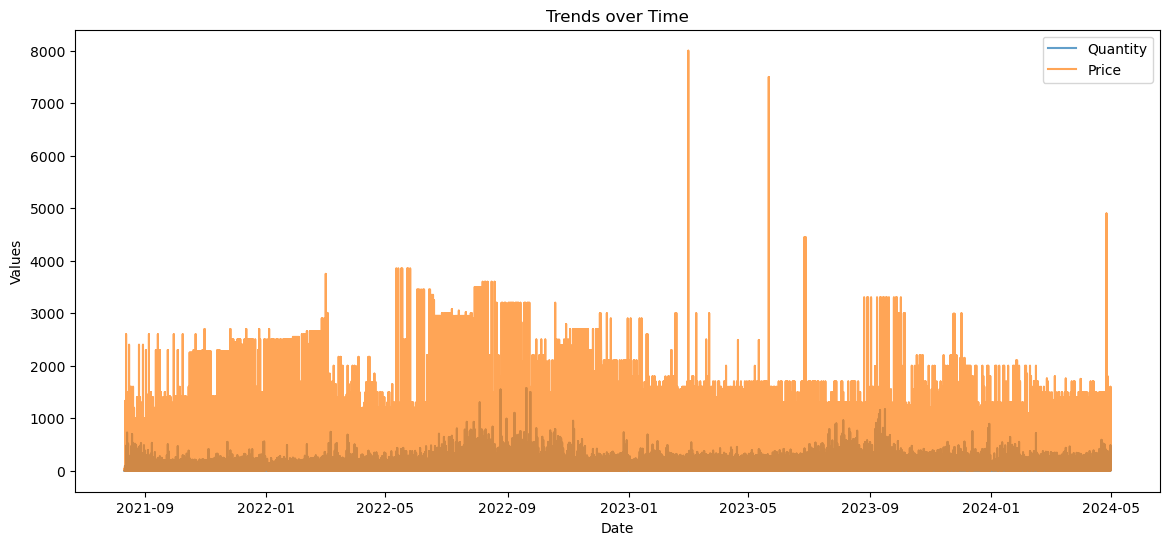

In [7]:
# Анализ количества и цены с течением времени
plt.figure(figsize=(14, 6))
plt.plot(df['DATEVAL'], df['QUANTITY'], label='Quantity', alpha=0.7)
plt.plot(df['DATEVAL'], df['PRICE'], label='Price', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Trends over Time')
plt.legend()
plt.show()

In [8]:
# Статистическое резюме для QUANTITY и PRICE
print("Statistical summary for QUANTITY and PRICE:")
print(df[['QUANTITY', 'PRICE']].describe())


Statistical summary for QUANTITY and PRICE:
           QUANTITY         PRICE
count  1.074728e+06  1.074728e+06
mean   8.415396e+00  1.389702e+02
std    2.285911e+01  1.572283e+02
min    6.000000e-03  2.000000e-02
25%    1.824000e+00  4.993587e+01
50%    3.000000e+00  8.999000e+01
75%    7.000000e+00  1.698900e+02
max    1.573862e+03  7.999000e+03


Top 10 ARTCEXR values:
ARTCEXR
1000003237266    989
1000003230438    988
1000003115038    988
1000003228800    987
1000003220638    986
1000003115040    986
1000003218095    985
1000003053221    984
1000003048265    984
1000003040452    983
Name: count, dtype: int64


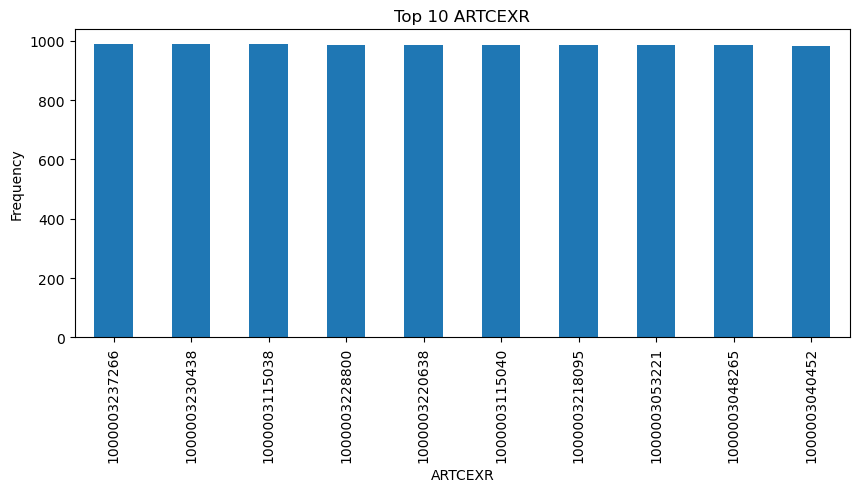

In [9]:
# Топ-10 наиболее частых значений в ARTCEXR
top_artcexr = df['ARTCEXR'].value_counts().head(10)
print("Top 10 ARTCEXR values:")
print(top_artcexr)

# График распределения топ-10 значений ARTCEXR
plt.figure(figsize=(10, 4))
top_artcexr.plot(kind='bar')
plt.title('Top 10 ARTCEXR')
plt.xlabel('ARTCEXR')
plt.ylabel('Frequency')
plt.show()


In [10]:
df

,DATEVAL,ARTCEXR,QUANTITY,PRICE
0,2021-08-11,1000000000772,1.000,29.990
1,2021-08-11,1000003176409,3.000,5.990
2,2021-08-12,1000000000402,2.000,99.250
3,2021-08-12,1000000000431,8.000,106.990
4,2021-08-12,1000000000464,2.000,44.990
...,...,...,...,...
1074723,2024-04-30,1000069306100,1.000,199.900
1074724,2024-04-30,1000069306115,1.000,359.900
1074725,2024-04-30,1000069306117,1.000,89.900
1074726,2024-04-30,1000069306120,2.042,379.001


In [33]:
df1 = df.copy()

In [34]:
df1.set_index('DATEVAL', inplace=True)

# Агрегация данных понедельно
weekly_data = df1.resample('W').sum()  # Можно использовать .mean(), .sum(), .count() в зависимости от нужд анализа

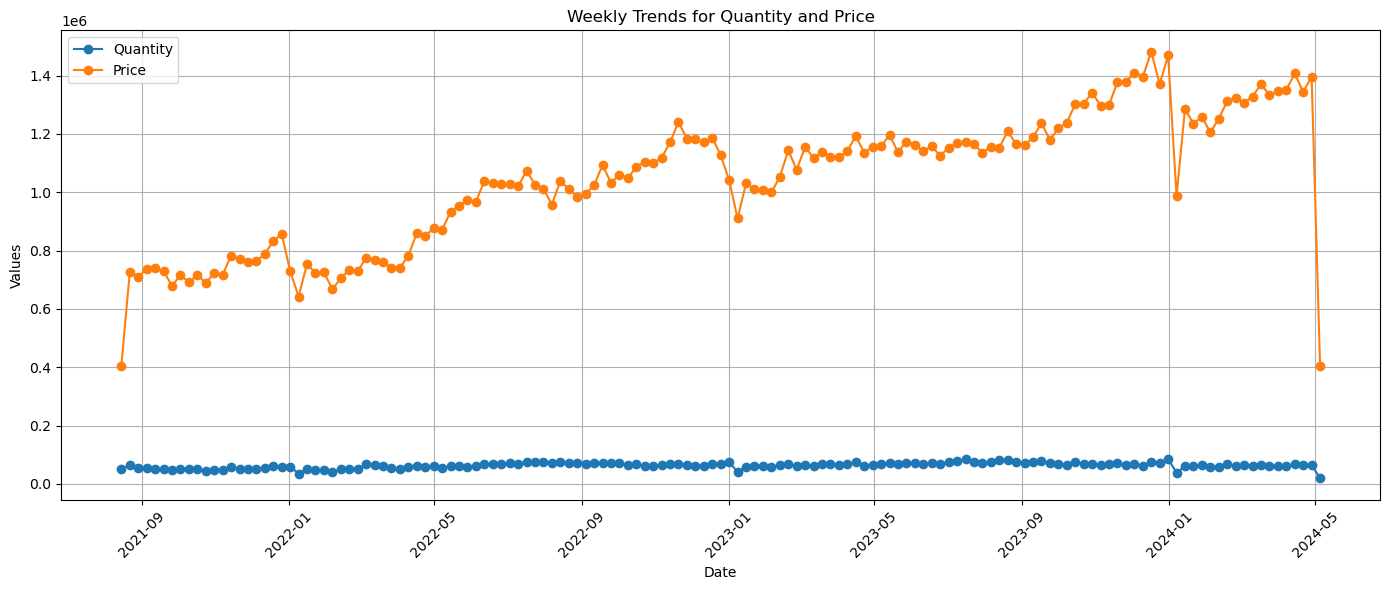

In [22]:
plt.figure(figsize=(14, 6))

# График для QUANTITY
plt.plot(weekly_data.index, weekly_data['QUANTITY'], label='Quantity', marker='o', linestyle='-')

# График для PRICE
plt.plot(weekly_data.index, weekly_data['PRICE'], label='Price', marker='o', linestyle='-')

# Настройка графика
plt.title('Weekly Trends for Quantity and Price')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Показать график
plt.show()

In [32]:
weekly_sales = df1.groupby('ARTCEXR').resample('W').sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [24]:
weekly_sales

ARTCEXR  QUANTITY     PRICE
ARTCEXR       DATEVAL                                      
1000000000367 2023-04-09  4000000001468      9.00  399.6000
              2023-04-16  7000000002569     28.00  699.3000
              2023-04-23  7000000002569     39.00  699.1433
              2023-04-30  7000000002569     29.00  698.2500
              2023-05-07  7000000002569     20.00  699.3000
...                                 ...       ...       ...
1000069306120 2024-05-05  2000138612240      2.57  757.9972
1000069306123 2024-04-28  6000415836738     16.00  419.1000
              2024-05-05  1000069306123      1.00   69.9000
1000069306141 2024-04-28  5000346530705     29.00  149.3500
              2024-05-05  2000138612282     15.00   59.8000

[266741 rows x 3 columns]

In [90]:
# Ограничение данных до первых 100000 записей
df1 = df[:100000].copy()

df1['revenue'] = df1['QUANTITY'] * df1['PRICE']
# # Установка DATEVAL как индекса
# df1.set_index('DATEVAL', inplace=True)

# Добавление столбца с неделями
df1['WEEK'] = df1['DATEVAL'].dt.to_period('W').apply(lambda r: r.start_time)

# # # Группировка данных по товарам и неделям и вычисление суммарных продаж за неделю
# weekly_sales = df1.groupby(['ARTCEXR', 'WEEK'])['QUANTITY'].sum().reset_index()
weekly_sales = df1.groupby(['ARTCEXR', 'WEEK']).agg({'QUANTITY': 'sum', 'revenue': 'sum'}).reset_index()


In [91]:
weekly_sales

,ARTCEXR,WEEK,QUANTITY,revenue
0,1000000000397,2021-08-09,11.0,1099.8900
1,1000000000397,2021-08-16,21.0,2096.9701
2,1000000000397,2021-08-23,31.0,3095.3496
3,1000000000397,2021-08-30,37.0,3691.8005
4,1000000000397,2021-09-06,37.0,3694.1695
...,...,...,...,...
19991,1000069216384,2021-10-25,16.0,5036.5100
19992,1000069216384,2021-11-01,7.0,2239.3601
19993,1000069216384,2021-11-08,11.0,3519.4400
19994,1000069216384,2021-11-15,15.0,4799.2101


In [69]:
total_sales = weekly_sales.groupby(['ARTCEXR'])['QUANTITY'].sum()

In [100]:
# Определение полного диапазона недель
all_weeks = weekly_sales['WEEK'].unique()

# Определение товаров, которые продаются каждую неделю
regular_artcexr = weekly_sales.groupby('ARTCEXR').filter(lambda x: len(x['WEEK'].unique()) == len(all_weeks))

# Определение товаров, которые не продаются каждую неделю (сезонные товары)
seasonal_artcexr = weekly_sales.groupby('ARTCEXR').filter(lambda x: len(x['WEEK'].unique()) < len(all_weeks))

# Таблицы для регулярных и сезонных товаров
regular_weekly_sales = regular_artcexr
seasonal_weekly_sales = seasonal_artcexr

# Вычисление топ-10 и низших-10 регулярных товаров
top_10_regular = regular_weekly_sales.groupby('ARTCEXR')['QUANTITY'].sum().nlargest(10).index
bottom_10_regular = regular_weekly_sales.groupby('ARTCEXR')['QUANTITY'].sum().nsmallest(10).index

# Вычисление топ-10 и низших-10 сезонных товаров
top_10_seasonal = seasonal_weekly_sales.groupby('ARTCEXR')['QUANTITY'].sum().nlargest(10).index
bottom_10_seasonal = seasonal_weekly_sales.groupby('ARTCEXR')['QUANTITY'].sum().nsmallest(10).index


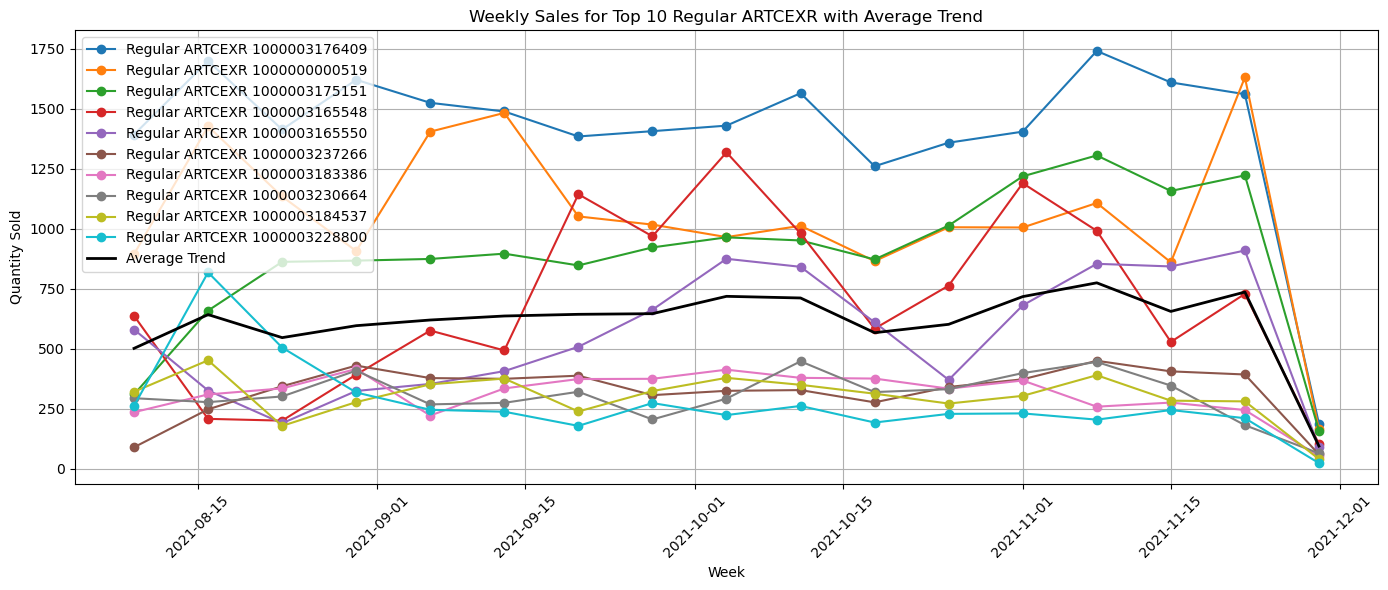

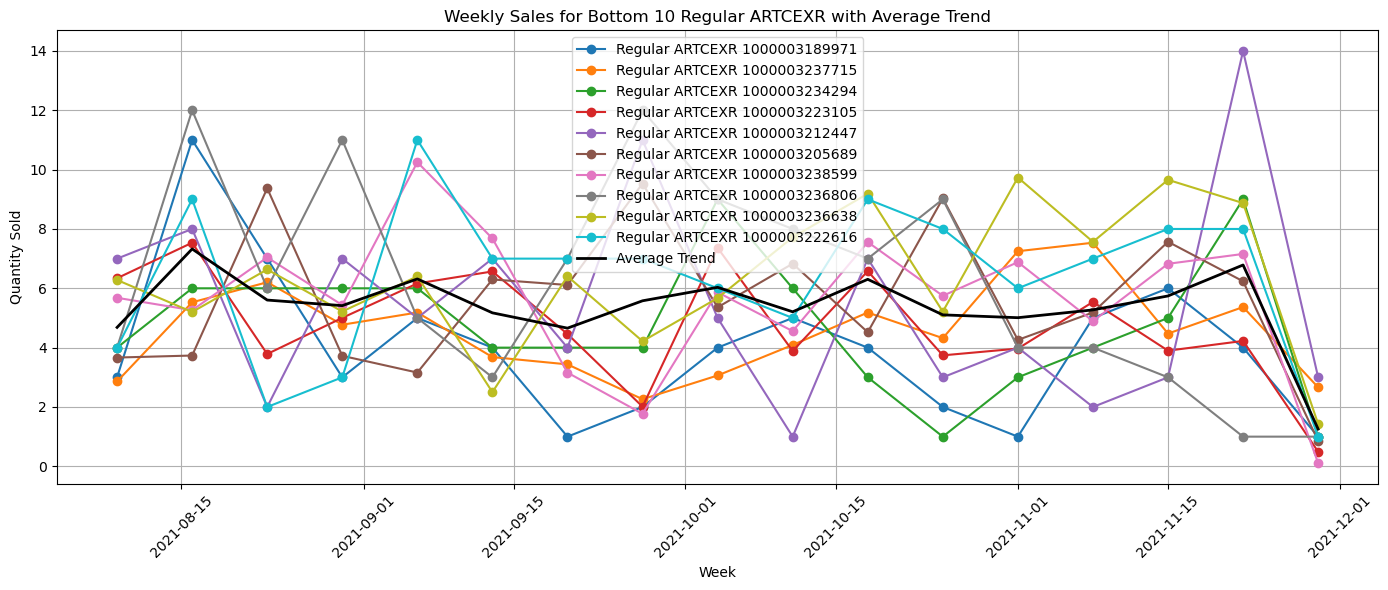

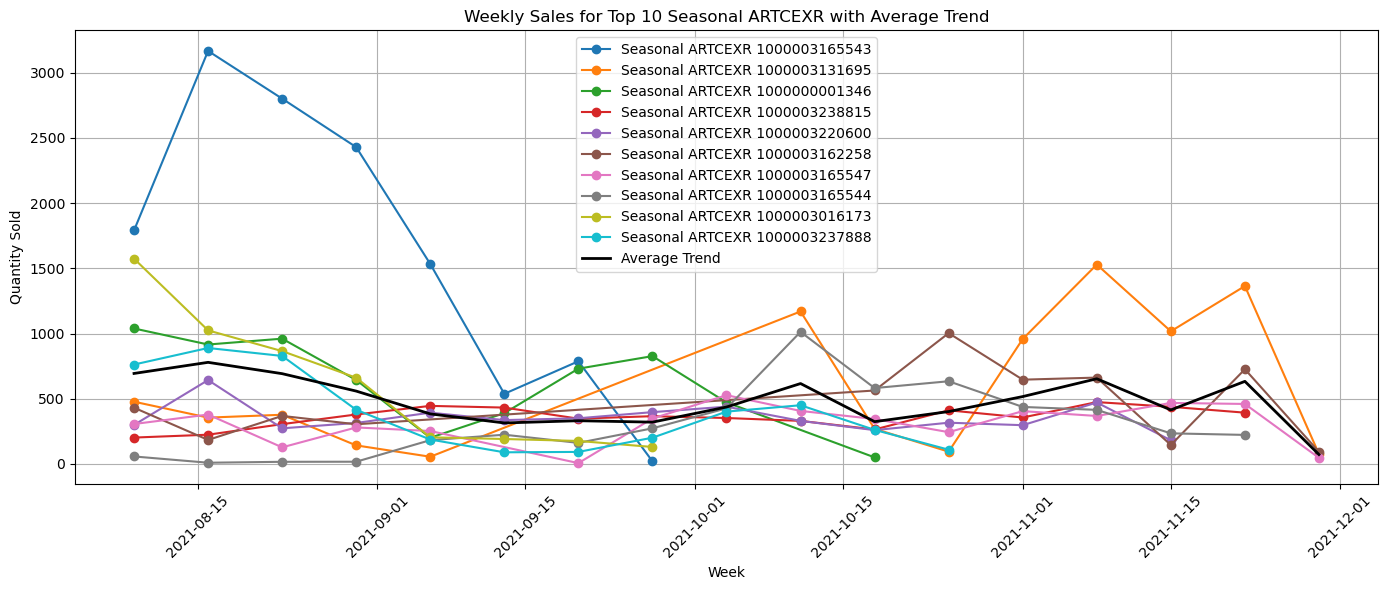

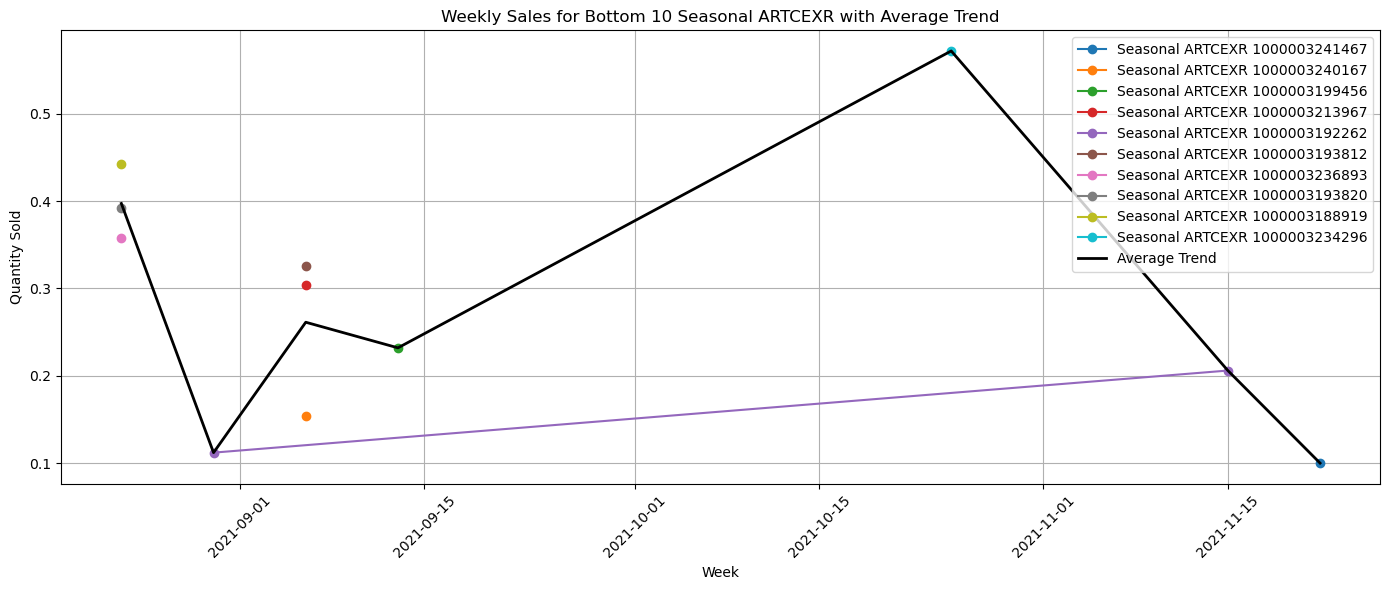

In [95]:
# Визуализация регулярных товаров
plt.figure(figsize=(14, 6))
top_regular_data = regular_weekly_sales[regular_weekly_sales['ARTCEXR'].isin(top_10_regular)]

for artcexr in top_10_regular:
    artcexr_data = top_regular_data[top_regular_data['ARTCEXR'] == artcexr]
    plt.plot(artcexr_data['WEEK'], artcexr_data['QUANTITY'], marker='o', linestyle='-', label=f'Regular ARTCEXR {artcexr}')

# Добавление усредняющей кривой
average_curve = top_regular_data.groupby('WEEK')['QUANTITY'].mean()
plt.plot(average_curve.index, average_curve, color='black', linestyle='-', linewidth=2, label='Average Trend')

plt.title('Weekly Sales for Top 10 Regular ARTCEXR with Average Trend')
plt.xlabel('Week')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
bottom_regular_data = regular_weekly_sales[regular_weekly_sales['ARTCEXR'].isin(bottom_10_regular)]

for artcexr in bottom_10_regular:
    artcexr_data = bottom_regular_data[bottom_regular_data['ARTCEXR'] == artcexr]
    plt.plot(artcexr_data['WEEK'], artcexr_data['QUANTITY'], marker='o', linestyle='-', label=f'Regular ARTCEXR {artcexr}')

# Добавление усредняющей кривой
average_curve = bottom_regular_data.groupby('WEEK')['QUANTITY'].mean()
plt.plot(average_curve.index, average_curve, color='black', linestyle='-', linewidth=2, label='Average Trend')

plt.title('Weekly Sales for Bottom 10 Regular ARTCEXR with Average Trend')
plt.xlabel('Week')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Визуализация сезонных товаров
plt.figure(figsize=(14, 6))
top_seasonal_data = seasonal_weekly_sales[seasonal_weekly_sales['ARTCEXR'].isin(top_10_seasonal)]

for artcexr in top_10_seasonal:
    artcexr_data = top_seasonal_data[top_seasonal_data['ARTCEXR'] == artcexr]
    plt.plot(artcexr_data['WEEK'], artcexr_data['QUANTITY'], marker='o', linestyle='-', label=f'Seasonal ARTCEXR {artcexr}')

# Добавление усредняющей кривой
average_curve = top_seasonal_data.groupby('WEEK')['QUANTITY'].mean()
plt.plot(average_curve.index, average_curve, color='black', linestyle='-', linewidth=2, label='Average Trend')

plt.title('Weekly Sales for Top 10 Seasonal ARTCEXR with Average Trend')
plt.xlabel('Week')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
bottom_seasonal_data = seasonal_weekly_sales[seasonal_weekly_sales['ARTCEXR'].isin(bottom_10_seasonal)]

for artcexr in bottom_10_seasonal:
    artcexr_data = bottom_seasonal_data[bottom_seasonal_data['ARTCEXR'] == artcexr]
    plt.plot(artcexr_data['WEEK'], artcexr_data['QUANTITY'], marker='o', linestyle='-', label=f'Seasonal ARTCEXR {artcexr}')

# Добавление усредняющей кривой
average_curve = bottom_seasonal_data.groupby('WEEK')['QUANTITY'].mean()
plt.plot(average_curve.index, average_curve, color='black', linestyle='-', linewidth=2, label='Average Trend')

plt.title('Weekly Sales for Bottom 10 Seasonal ARTCEXR with Average Trend')
plt.xlabel('Week')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

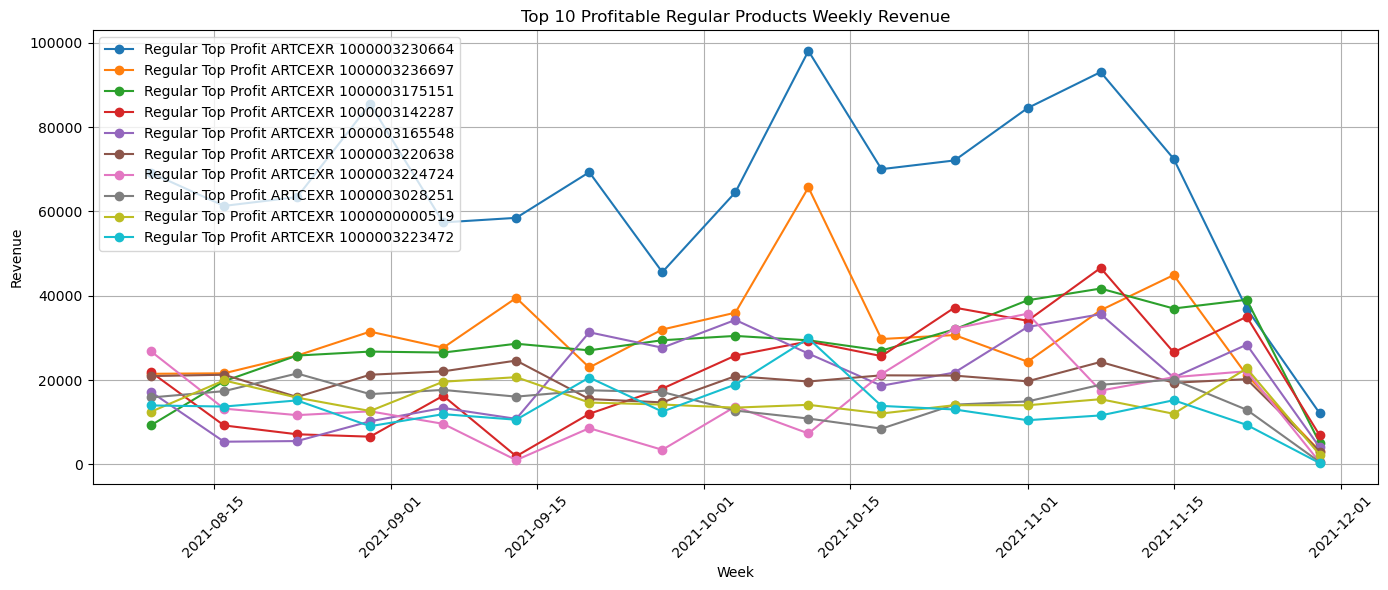

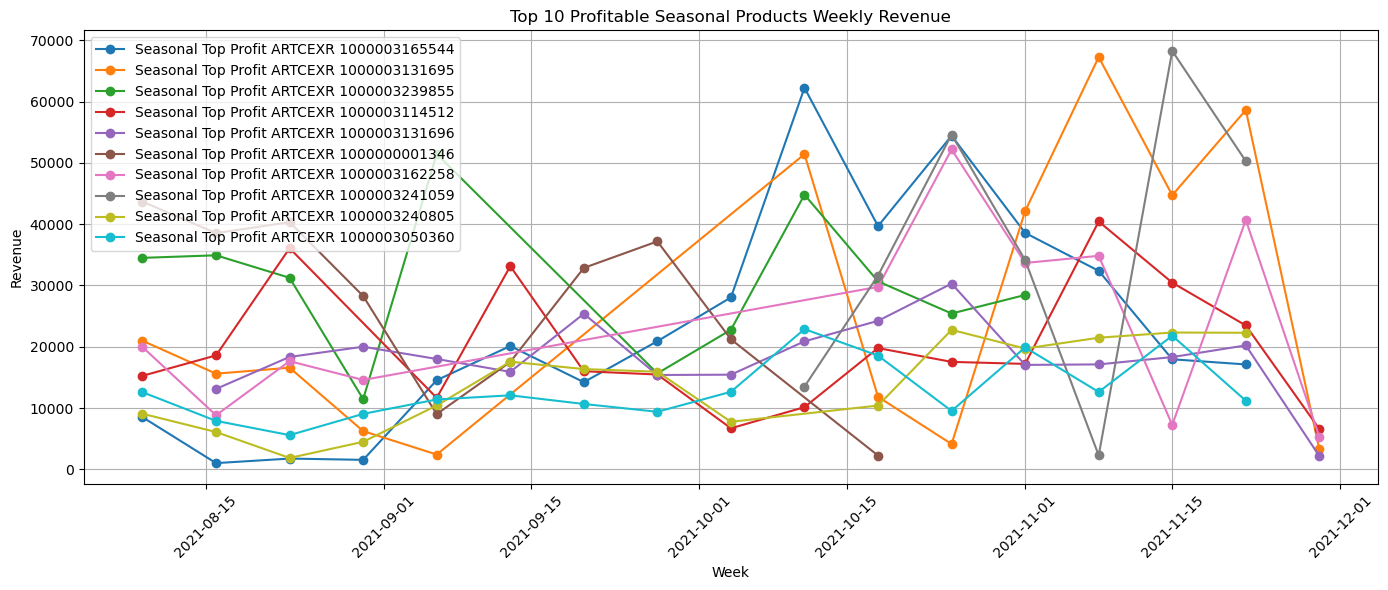

In [102]:


# Вычисление общей прибыли и выбор топ-10 и последних 10 прибыльных товаров для каждой категории
top_10_regular_profit = regular_weekly_sales.groupby('ARTCEXR')['revenue'].sum().nlargest(10).index
bottom_10_regular_profit = regular_weekly_sales.groupby('ARTCEXR')['revenue'].sum().nsmallest(10).index

top_10_seasonal_profit = seasonal_weekly_sales.groupby('ARTCEXR')['revenue'].sum().nlargest(10).index
bottom_10_seasonal_profit = seasonal_weekly_sales.groupby('ARTCEXR')['revenue'].sum().nsmallest(10).index

# Фильтрация данных для визуализации
top_regular_data = regular_weekly_sales[regular_weekly_sales['ARTCEXR'].isin(top_10_regular_profit)]
bottom_regular_data = regular_weekly_sales[regular_weekly_sales['ARTCEXR'].isin(bottom_10_regular_profit)]

top_seasonal_data = seasonal_weekly_sales[seasonal_weekly_sales['ARTCEXR'].isin(top_10_seasonal_profit)]
bottom_seasonal_data = seasonal_weekly_sales[seasonal_weekly_sales['ARTCEXR'].isin(bottom_10_seasonal_profit)]

# Проверка и построение графиков для регулярных товаров
plt.figure(figsize=(14, 6))
if not top_regular_data.empty:
    for artcexr in top_10_regular_profit:
        data = top_regular_data[top_regular_data['ARTCEXR'] == artcexr]
        if not data.empty:
            plt.plot(data['WEEK'], data['revenue'], marker='o', linestyle='-', label=f'Regular Top Profit ARTCEXR {artcexr}')
    plt.title('Top 10 Profitable Regular Products Weekly Revenue')
    plt.xlabel('Week')
    plt.ylabel('Revenue')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for top regular products.")

# Аналогичная проверка для сезонных товаров
plt.figure(figsize=(14, 6))
if not top_seasonal_data.empty:
    for artcexr in top_10_seasonal_profit:
        data = top_seasonal_data[top_seasonal_data['ARTCEXR'] == artcexr]
        if not data.empty:
            plt.plot(data['WEEK'], data['revenue'], marker='o', linestyle='-', label=f'Seasonal Top Profit ARTCEXR {artcexr}')
    plt.title('Top 10 Profitable Seasonal Products Weekly Revenue')
    plt.xlabel('Week')
    plt.ylabel('Revenue')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for top seasonal products.")

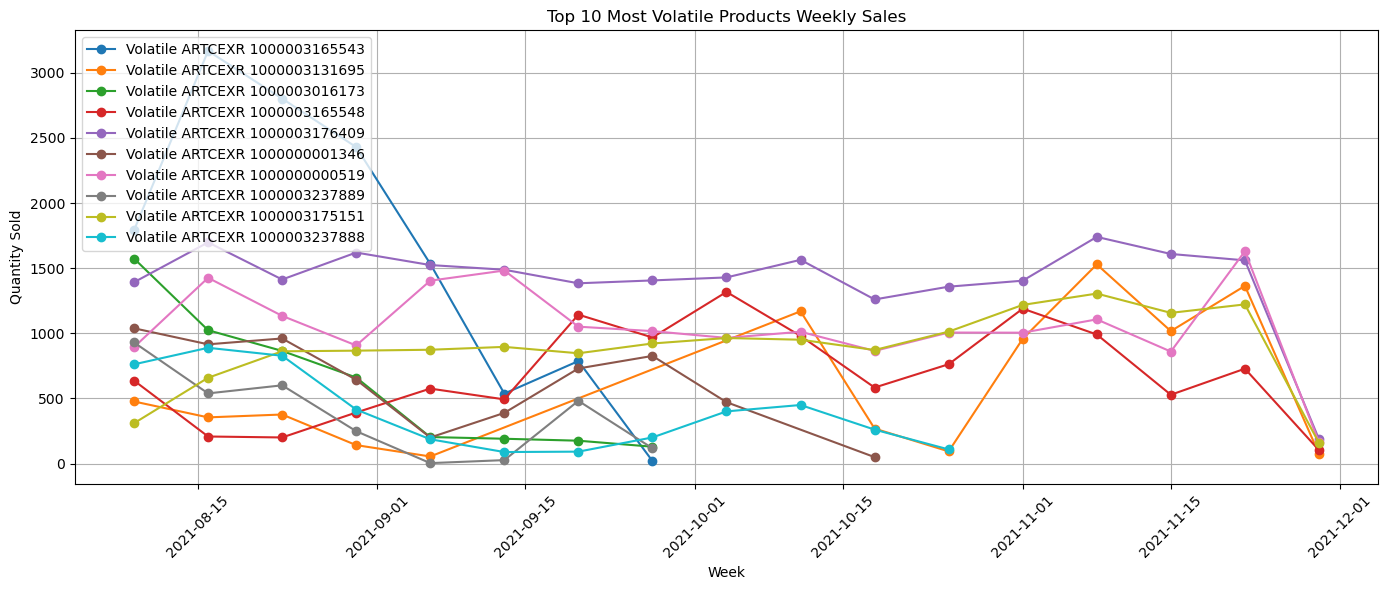

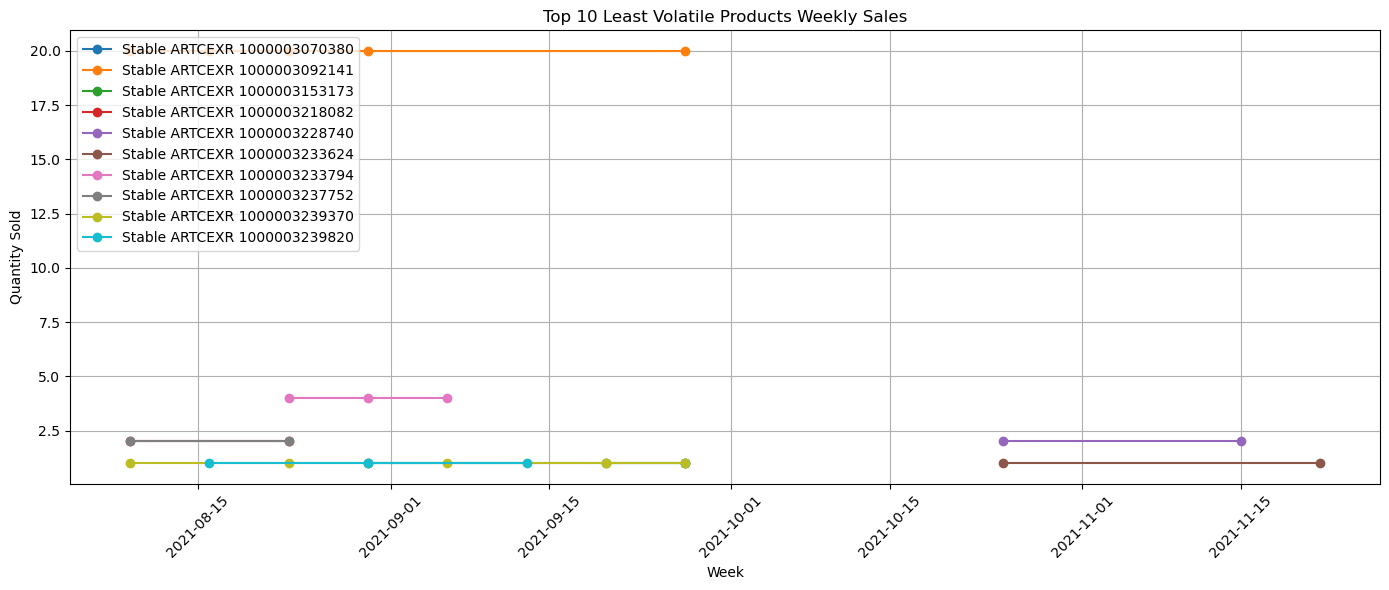

In [103]:
# Расчет стандартного отклонения продаж по каждому товару
std_dev_sales = weekly_sales.groupby('ARTCEXR')['QUANTITY'].std().reset_index()

# Определение товаров с наибольшим и наименьшим изменениями в продажах
top_10_volatile = std_dev_sales.nlargest(10, 'QUANTITY')['ARTCEXR']
bottom_10_stable = std_dev_sales.nsmallest(10, 'QUANTITY')['ARTCEXR']

# Фильтрация данных для визуализации волатильных и стабильных продаж
volatile_sales_data = weekly_sales[weekly_sales['ARTCEXR'].isin(top_10_volatile)]
stable_sales_data = weekly_sales[weekly_sales['ARTCEXR'].isin(bottom_10_stable)]

# Визуализация данных для товаров с наибольшими изменениями
plt.figure(figsize=(14, 6))
for artcexr in top_10_volatile:
    data = volatile_sales_data[volatile_sales_data['ARTCEXR'] == artcexr]
    plt.plot(data['WEEK'], data['QUANTITY'], marker='o', linestyle='-', label=f'Volatile ARTCEXR {artcexr}')
plt.title('Top 10 Most Volatile Products Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Quantity Sold')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Визуализация данных для товаров с наименьшими изменениями
plt.figure(figsize=(14, 6))
for artcexr in bottom_10_stable:
    data = stable_sales_data[stable_sales_data['ARTCEXR'] == artcexr]
    plt.plot(data['WEEK'], data['QUANTITY'], marker='o', linestyle='-', label=f'Stable ARTCEXR {artcexr}')
plt.title('Top 10 Least Volatile Products Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Quantity Sold')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()